# In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves


In [ ]:
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)

In [4]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 

#Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [8]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=500, epochs=50, validation_split=0.2) 

Epoch 1/50
96/96 [==============================] - 1s 6ms/step - loss: 1.9217 - accuracy: 0.4342 - val_loss: 1.5829 - val_accuracy: 0.6604
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 1.4016 - accuracy: 0.7060 - val_loss: 1.2146 - val_accuracy: 0.7602
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 1.1331 - accuracy: 0.7678 - val_loss: 1.0105 - val_accuracy: 0.8031
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.9760 - accuracy: 0.7974 - val_loss: 0.8837 - val_accuracy: 0.8264
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.8736 - accuracy: 0.8156 - val_loss: 0.7977 - val_accuracy: 0.8380
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.8015 - accuracy: 0.8269 - val_loss: 0.7352 - val_accuracy: 0.8477
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.7479 - accuracy: 0.8351 - val_loss: 0.6882 - val_accuracy: 0.8532
Epoch 8/50
96/96 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


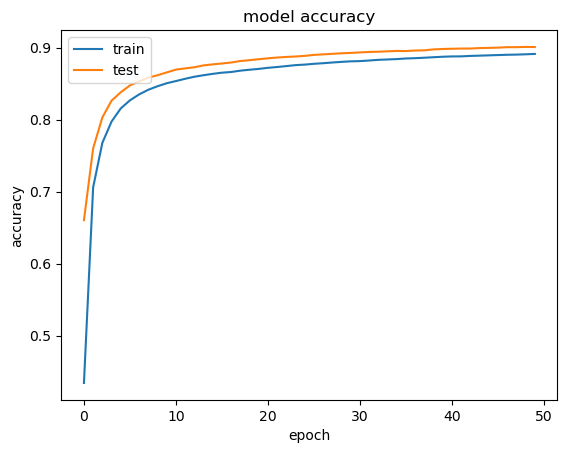

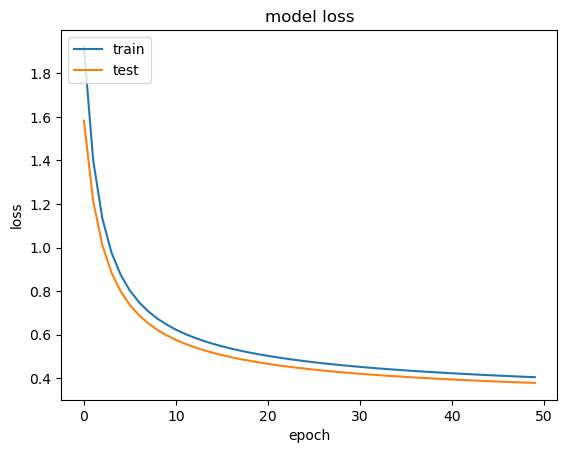

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8992
Test accuracy: 0.8992000222206116


In [14]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [14]:
y_predicted = model_1.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 981us/step


array([4.0392415e-04, 7.2563712e-06, 3.0564965e-04, 2.1544315e-03,
       1.6706217e-04, 1.5568297e-04, 1.5912894e-05, 9.9068707e-01,
       3.7910655e-04, 5.7238196e-03], dtype=float32)

In [16]:
import numpy as np

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

# Improved Model 2: Adding Hidden Layer – Multi Layer Perceptron

In [15]:
#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:

model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0735 - accuracy: 0.7203 - val_loss: 0.4847 - val_accuracy: 0.8723
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.8822 - val_loss: 0.3579 - val_accuracy: 0.9005
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.9007 - val_loss: 0.3129 - val_accuracy: 0.9131
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.9104 - val_loss: 0.2844 - val_accuracy: 0.9208
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2912 - accuracy: 0.9176 - val_loss: 0.2660 - val_accuracy: 0.9257
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.9235 - val_loss: 0.2504 - val_accuracy: 0.9299
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2547 - accuracy: 0.9283 - val_loss: 0.2384 - val_accuracy: 0.9330

# Plot the change in accuracy and loss per epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


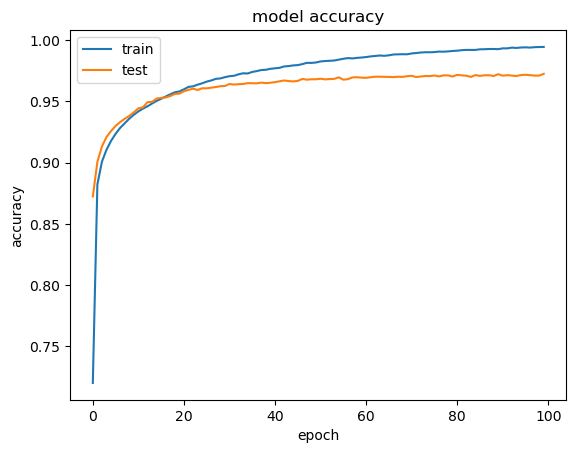

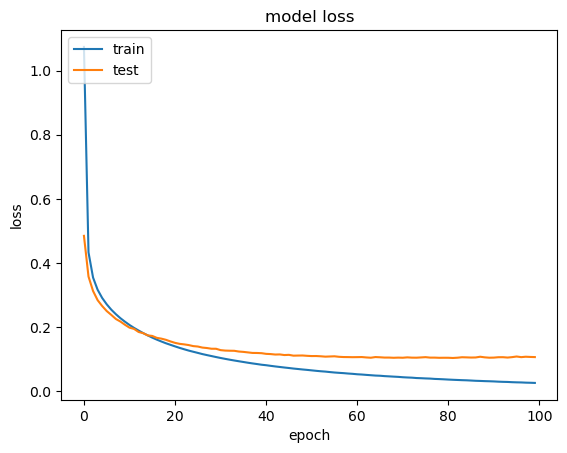

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9738
Test accuracy: 0.973800003528595


# Improved Model 3 – Adding Dropout to Avoid Overfitting

In [18]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
N_hidden = 128


# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

#Adding a dropout layer to avoid the overfitting
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 1.3355 - accuracy: 0.5733 - val_loss: 0.5501 - val_accuracy: 0.8606
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6554 - accuracy: 0.7970 - val_loss: 0.3739 - val_accuracy: 0.8941
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5131 - accuracy: 0.8443 - val_loss: 0.3145 - val_accuracy: 0.9093
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4413 - accuracy: 0.8701 - val_loss: 0.2803 - val_accuracy: 0.9183
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3977 - accuracy: 0.8828 - val_loss: 0.2587 - val_accuracy: 0.9247
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3685 - accuracy: 0.8921 - val_loss: 0.2375 - val_accuracy: 0.9303
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3437 - accuracy: 0.8977 - val_loss: 0.2226 - val_accuracy: 0.9345
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


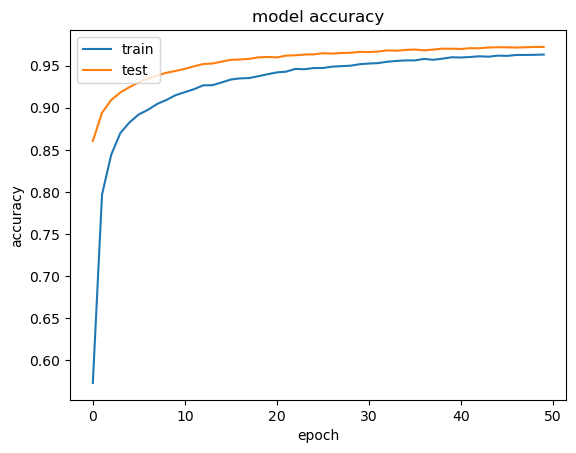

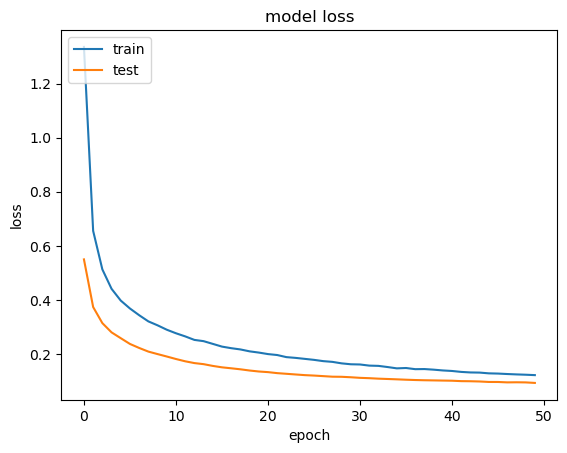

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9723
Test accuracy: 0.9722999930381775


# Improved Model 4: Increasing the number of Hidden Layer neuron

In [21]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 

Epoch 1/31
375/375 [==============================] - 5s 13ms/step - loss: 0.3023 - accuracy: 0.9072 - val_loss: 0.1263 - val_accuracy: 0.9620
Epoch 2/31
375/375 [==============================] - 4s 12ms/step - loss: 0.1286 - accuracy: 0.9595 - val_loss: 0.0949 - val_accuracy: 0.9711
Epoch 3/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0909 - accuracy: 0.9716 - val_loss: 0.0853 - val_accuracy: 0.9739
Epoch 4/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0715 - accuracy: 0.9773 - val_loss: 0.0843 - val_accuracy: 0.9752
Epoch 5/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0602 - accuracy: 0.9803 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 6/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 0.0820 - val_accuracy: 0.9763
Epoch 7/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0450 - accuracy: 0.9854 - val_loss: 0.0839 - val_accuracy: 0.9784

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


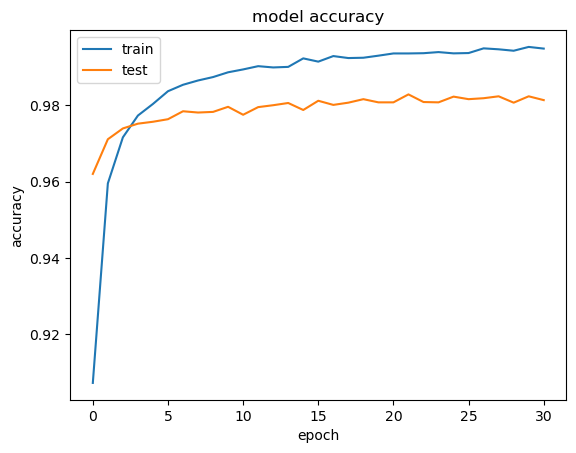

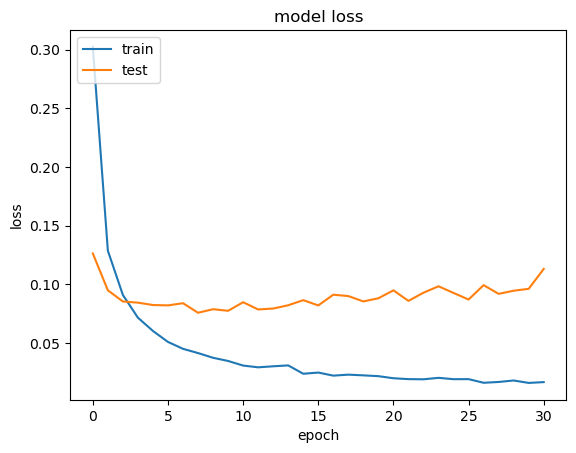

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9819
Test accuracy: 0.9818999767303467
